<a href="https://colab.research.google.com/github/Salonijibhe/Bubble-Sort-Visualization/blob/main/decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score


In [ ]:
# Load your dataset
data = pd.read_csv('/content/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv')


In [ ]:
# Check for missing values and drop them if necessary
data = data.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg', 'pollutant_id', 'city', 'last_update'])


In [ ]:
# Manually map pollutant_id to numeric values
pollutant_mapping = {
    'PM2.5':  1,
    'PM10':   2,
    'OZONE':  3,
    'SO2':    4,
    'NO2':    5,
    'CO':     6
}

In [ ]:
# Map pollutant_id to numeric values using the mapping
data['pollutant_id_encoded'] = data['pollutant_id'].map(pollutant_mapping)


In [ ]:
def calculate_aqi(row):
    pollutant = row['pollutant_id']
    avg = row['pollutant_avg']

    # Convert µg/m³ to ppm or ppb, depending on the pollutant
    if pollutant == 'OZONE':
        avg = avg * 0.000509
    elif pollutant == 'SO2':
        avg = avg * 0.000382
    elif pollutant == 'NO2':
        avg = avg * 0.000532
    elif pollutant == 'CO':
        avg = avg * 0.000872

    # Now apply AQI ranges
    if pollutant == 'PM2.5':
        if avg <= 12:
            return (avg / 12) * 50
        elif avg <= 35.4:
            return ((avg - 12) / (35.4 - 12)) * (100 - 51) + 51
        elif avg <= 55.4:
            return ((avg - 35.5) / (55.4 - 35.5)) * (150 - 101) + 101
        elif avg <= 150.4:
            return ((avg - 55.5) / (150.4 - 55.5)) * (200 - 151) + 151
        else:
            return 200 + ((avg - 150.4) / (250.4 - 150.4)) * (300 - 201)

    elif pollutant == 'PM10':
        if avg <= 54:
            return (avg / 54) * 50
        elif avg <= 154:
            return ((avg - 54) / (154 - 54)) * (100 - 51) + 51
        elif avg <= 254:
            return ((avg - 155) / (254 - 155)) * (150 - 101) + 101
        elif avg <= 354:
            return ((avg - 255) / (354 - 255)) * (200 - 151) + 151
        else:
            return 200 + ((avg - 354) / (424 - 354)) * (300 - 201)

    elif pollutant == 'OZONE':
        if avg <= 0.054:
            return (avg / 0.054) * 50
        elif avg <= 0.070:
            return ((avg - 0.055) / (0.070 - 0.055)) * (100 - 51) + 51
        elif avg <= 0.085:
            return ((avg - 0.071) / (0.085 - 0.071)) * (150 - 101) + 101
        else:
            return 200 + ((avg - 0.085) / (0.105 - 0.085)) * (300 - 201)

    elif pollutant == 'SO2':
        if avg <= 0.035:
            return (avg / 0.035) * 50
        elif avg <= 0.075:
            return ((avg - 0.036) / (0.075 - 0.036)) * (100 - 51) + 51
        else:
            return 200 + ((avg - 0.075) / (0.185 - 0.075)) * (300 - 201)

    elif pollutant == 'NO2':
        if avg <= 0.053:
            return (avg / 0.053) * 50
        elif avg <= 0.100:
            return ((avg - 0.054) / (0.100 - 0.054)) * (100 - 51) + 51
        else:
            return 200 + ((avg - 0.100) / (0.360 - 0.100)) * (300 - 201)

    elif pollutant == 'CO':
        if avg <= 4.4:
            return (avg / 4.4) * 50
        elif avg <= 9.4:
            return ((avg - 4.5) / (9.4 - 4.5)) * (100 - 51) + 51
        else:
            return 200 + ((avg - 9.4) / (12.4 - 9.4)) * (300 - 201)

    return 0


In [ ]:
# Apply AQI calculation to each row
data['AQI_calculated'] = data.apply(calculate_aqi, axis=1)

In [ ]:
# Create AQI category labels for classification
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [ ]:
data['AQI_category'] = data['AQI_calculated'].apply(categorize_aqi)

In [ ]:
# Health Risk Indicator based on AQI
def health_risk_indicator(aqi_value):
    if aqi_value <= 50:
        return "Good: Air quality is satisfactory."
    elif aqi_value <= 100:
        return "Moderate: Acceptable; minor health concerns."
    elif aqi_value <= 150:
        return "Unhealthy for Sensitive Groups: Sensitive individuals should limit outdoor exertion."
    elif aqi_value <= 200:
        return "Unhealthy: Health effects possible for everyone."
    elif aqi_value <= 300:
        return "Very Unhealthy: Health alert for all."
    else:
        return "Hazardous: Health warnings of emergency conditions."

In [ ]:
data['Health_Risk'] = data['AQI_calculated'].apply(health_risk_indicator)

In [ ]:
data.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_id_encoded,AQI_calculated,AQI_category,Health_Risk
0,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",06-11-2024 18:00:00,14.675886,77.593027,OZONE,6.0,82.0,69.0,3,32.519444,Good,Good: Air quality is satisfactory.
1,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",06-11-2024 18:00:00,26.108870,91.589544,OZONE,10.0,20.0,17.0,3,8.012037,Good,Good: Air quality is satisfactory.
2,India,Assam,Nagaon,"Christianpatty, Nagaon - PCBA",06-11-2024 18:00:00,26.349082,92.684490,OZONE,8.0,17.0,10.0,3,4.712963,Good,Good: Air quality is satisfactory.
3,India,Chhattisgarh,Bhilai,"32Bungalows, Bhilai - CECB",06-11-2024 18:00:00,21.194815,81.314770,OZONE,3.0,197.0,116.0,3,64.210400,Moderate,Moderate: Acceptable; minor health concerns.
4,India,Chhattisgarh,Bhilai,"Hathkhoj, Bhilai - CECB",06-11-2024 18:00:00,21.224231,81.408350,OZONE,9.0,93.0,74.0,3,34.875926,Good,Good: Air quality is satisfactory.


In [ ]:
# Prepare data for model training
X = data[['pollutant_min', 'pollutant_max', 'pollutant_avg', 'pollutant_id_encoded']]
y_classification = data['AQI_category']
y_regression = data['AQI_calculated']

In [ ]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_class, y_train_class)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Evaluate models
print("Classifier Performance:")
print(classification_report(y_test_class, dt_classifier.predict(X_test_class)))


Classifier Performance:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00        82
                     Hazardous       1.00      1.00      1.00         3
                      Moderate       0.82      1.00      0.90         9
Unhealthy for Sensitive Groups       1.00      0.71      0.83         7
                Very Unhealthy       1.00      1.00      1.00         3

                      accuracy                           0.98       104
                     macro avg       0.96      0.94      0.95       104
                  weighted avg       0.98      0.98      0.98       104



In [ ]:
print("\nRegressor Performance:")
print(f"R2 Score: {r2_score(y_test_reg, dt_regressor.predict(X_test_reg))}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, dt_regressor.predict(X_test_reg))}")


Regressor Performance:
R2 Score: 0.9855039938208143
Mean Squared Error: 66.2119546169703


In [ ]:
# User input for prediction
try:
    print("Enter pollutant details to predict AQI:")
    pollutant_min = float(input("Pollutant Minimum: "))
    pollutant_max = float(input("Pollutant Maximum: "))
    pollutant_avg = float(input("Pollutant Average: "))
    pollutant_id = input("Pollutant ID (PM2.5, PM10, OZONE, SO2, NO2, CO): ")

    # Validate pollutant_id
    if pollutant_id not in pollutant_mapping:
        raise ValueError("Invalid Pollutant ID. Choose from PM2.5, PM10, OZONE, SO2, NO2, CO.")

    pollutant_id_encoded = pollutant_mapping[pollutant_id]
    input_data = pd.DataFrame({
        'pollutant_min': [pollutant_min],
        'pollutant_max': [pollutant_max],
        'pollutant_avg': [pollutant_avg],
        'pollutant_id_encoded': [pollutant_id_encoded]
    })

    predicted_category = dt_classifier.predict(input_data)[0]
    predicted_aqi = dt_regressor.predict(input_data)[0]
    health_risk = health_risk_indicator(predicted_aqi)

    print(f"Predicted AQI Category: {predicted_category}")
    print(f"Predicted AQI Value: {predicted_aqi}")
    print(f"Health Risk: {health_risk}")

except Exception as e:
    print(f"Error: {e}")

Enter pollutant details to predict AQI:
Pollutant Minimum: 55
Pollutant Maximum: 76
Pollutant Average: 456
Pollutant ID (PM2.5, PM10, OZONE, SO2, NO2, CO): co
Error: Invalid Pollutant ID. Choose from PM2.5, PM10, OZONE, SO2, NO2, CO.


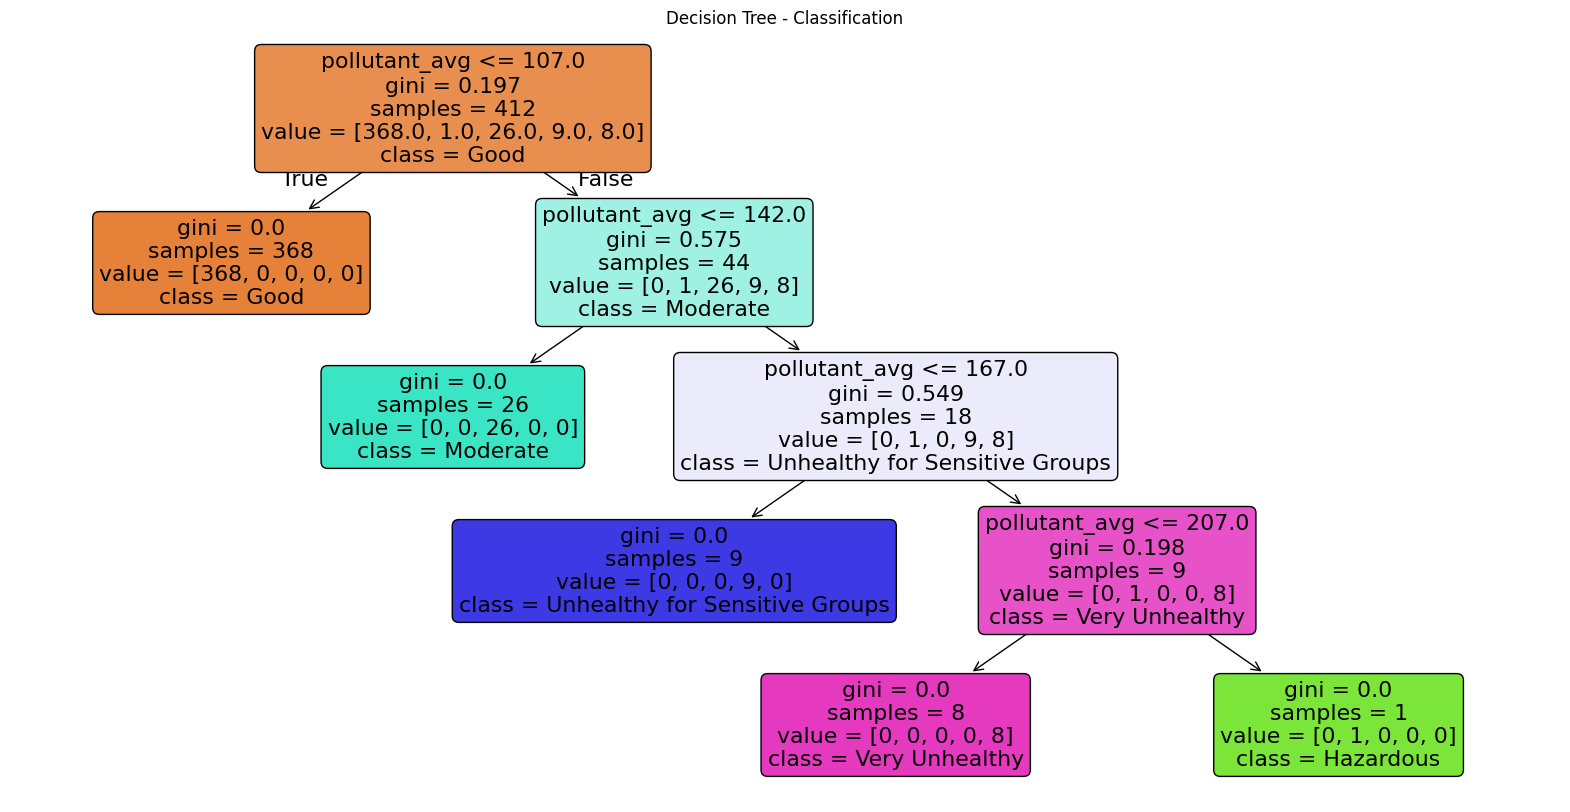

In [ ]:
from sklearn.tree import plot_tree
# Plot Decision Tree for Classification
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=['pollutant_min', 'pollutant_max', 'pollutant_avg', 'pollutant_id_encoded'],
    class_names=dt_classifier.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision Tree - Classification")
plt.show()


In [ ]:
# Evaluate Decision Tree Classifier
train_pred_class = dt_classifier.predict(X_train_class)
test_pred_class = dt_classifier.predict(X_test_class)

train_accuracy = accuracy_score(y_train_class, train_pred_class)
test_accuracy = accuracy_score(y_test_class, test_pred_class)

print("Classifier Performance:")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

if train_accuracy - test_accuracy > 0.1:
    print("The classifier is likely overfitting.")
else:
    print("The classifier is not overfitting.")



Classifier Performance:
Training Accuracy: 1.0
Testing Accuracy: 0.9807692307692307
The classifier is not overfitting.


In [ ]:
# Evaluate Decision Tree Regressor
train_pred_reg = dt_regressor.predict(X_train_reg)
test_pred_reg = dt_regressor.predict(X_test_reg)

train_mse = mean_squared_error(y_train_reg, train_pred_reg)
test_mse = mean_squared_error(y_test_reg, test_pred_reg)

train_r2 = r2_score(y_train_reg, train_pred_reg)
test_r2 = r2_score(y_test_reg, test_pred_reg)



print("\nRegressor Performance:")
print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Testing Mean Squared Error (MSE): {test_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing R^2 Score: {test_r2}")

if train_r2 - test_r2 > 0.1:
    print("The regressor is likely overfitting.")
else:
    print("The regressor is not overfitting.")


Regressor Performance:
Training Mean Squared Error (MSE): 2.2318349336122374e-31
Testing Mean Squared Error (MSE): 66.2119546169703
Training R^2 Score: 1.0
Testing R^2 Score: 0.9855039938208143
The regressor is not overfitting.


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate classifier
cv_scores_class = cross_val_score(dt_classifier, X_classification, y_classification, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy (Classification):", cv_scores_class)
print("Average CV Accuracy (Classification):", np.mean(cv_scores_class))

# Cross-validate regressor
cv_scores_reg = cross_val_score(dt_regressor, X_regression, y_regression, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE (Regression):", -cv_scores_reg)
print("Average CV MSE (Regression):", -np.mean(cv_scores_reg))


Cross-Validation Accuracy (Classification): [1.         0.99029126 1.         1.         0.99029126]
Average CV Accuracy (Classification): 0.996116504854369
Cross-Validation MSE (Regression): [16.43071173 24.68774631  4.74918333 11.77968201 31.46948031]
Average CV MSE (Regression): 17.823360737010788


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
